## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.model_selection import cross_val_score

## Read Dataset

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')

## Dataset Overview

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Drop some unnecessary columns

In [5]:
data = data.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'])


## Data Preprocessing: Label Encoding and Remove Null Records

In [6]:
data = data.dropna()
# Encoding categorical data
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])  # Convert 'Sex' to numerical

In [7]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


## Exploratory Data Analysis

#### Data Overview

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,714.0,0.406162,0.491460,0.00,0.000,0.0000,1.000,1.0000
Pclass,714.0,2.236695,0.838250,1.00,1.000,2.0000,3.000,3.0000
Sex,714.0,0.634454,0.481921,0.00,0.000,1.0000,1.000,1.0000
Age,714.0,29.699118,14.526497,0.42,20.125,28.0000,38.000,80.0000
SibSp,714.0,0.512605,0.929783,0.00,0.000,0.0000,1.000,5.0000
Parch,714.0,0.431373,0.853289,0.00,0.000,0.0000,1.000,6.0000
Fare,714.0,34.694514,52.918930,0.00,8.050,15.7417,33.375,512.3292


#### Data Distribution

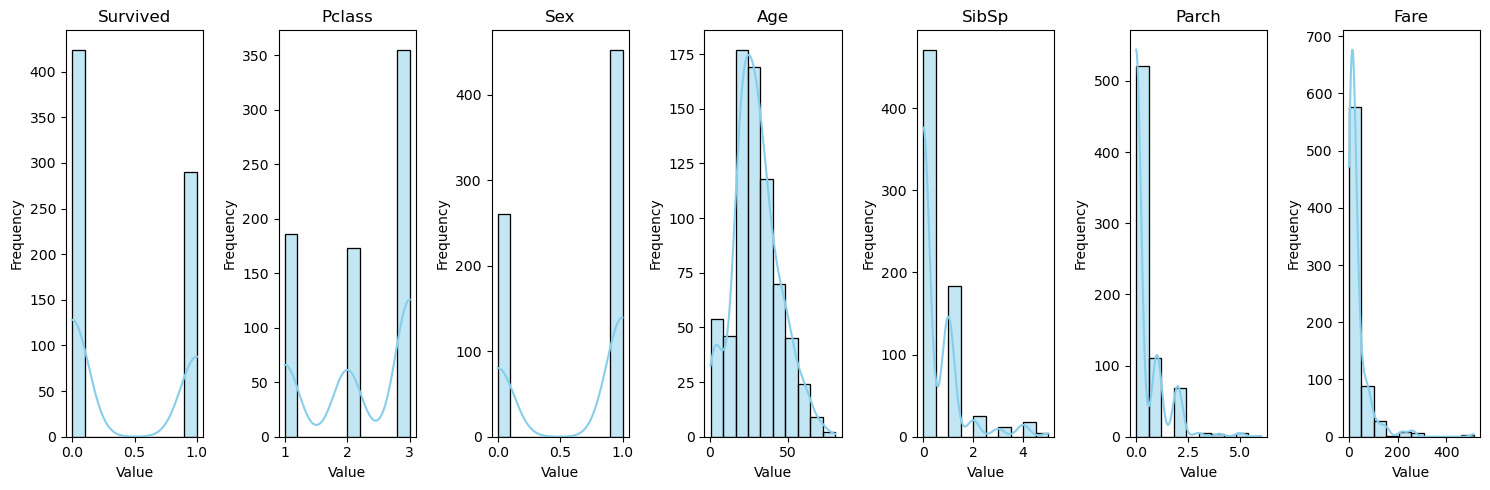

In [10]:
# Set the number of features
num_features = data.select_dtypes(include='number').shape[1]

# Create a single figure with a grid layout
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(15, 5))

# Plotting the distribution for each feature in smaller axes
for i, column in enumerate(data.select_dtypes(include='number').columns):
    sns.histplot(data[column], bins=10, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Correlation Matrix

<Axes: >

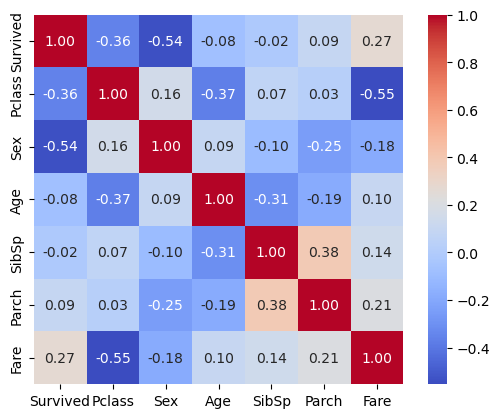

In [11]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

## Columns selected for prediction

#### Dataset Based on Correlation

In [12]:
dataset1 = data[['Fare', 'Sex', 'Pclass']]
dataset1.head()

,Fare,Sex,Pclass
0,7.2500,1,3
1,71.2833,0,1
2,7.9250,0,3
3,53.1000,0,1
4,8.0500,1,3


#### Dataset Based on social principle that prioritizes the safety of women and children during emergencies or evacuations (Sex and Age)

In [13]:
dataset2 = data[['Age', 'Sex']]
dataset2.head()

,Age,Sex
0,22.0,1
1,38.0,0
2,26.0,0
3,35.0,0
4,35.0,1


#### Dataset Based on PCA (3 Features to compare with Dataset 1)

In [14]:
pca = PCA(n_components=3).fit(data)
dataset3 = pca.fit_transform(data)
print(dataset3)

[[-27.65989362  -6.92516426   0.07073424]
 [ 36.82171079   7.26285412   0.06641428]
 [-26.86947728  -2.93438289  -0.55356224]
 ...
 [ -4.98636161 -10.52160973  -1.03295416]
 [ -4.7886222   -3.52402365  -0.92582999]
 [-26.87762841   3.07266072  -0.43261328]]


## The training and testing split

#### Dataset 1

In [15]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(
    dataset1, data['Survived'], test_size=0.3, random_state=1
)

#### Dataset 2

In [16]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(
    dataset2, data['Survived'], test_size=0.3, random_state=1
)

#### Dataset 3

In [17]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(
    dataset3, data['Survived'], test_size=0.3, random_state=1
)

## SVM model building, Training, and Result

### Dataset 1

In [18]:
clf1 = svm.SVC(kernel="linear")
scores = cross_val_score(clf1, X1_train, Y1_train, cv=10)
print(scores)\
clf1.fit(X1_train, Y1_train)

[0.82       0.8        0.7        0.78       0.82       0.74
 0.74       0.74       0.88       0.79591837]


SVC(kernel='linear')

#### Predicting

In [19]:
y1_predict = clf1.predict(X1_test)

#### Accuracy

In [20]:
print("Accuracy:", accuracy_score(Y1_test, y1_predict))

Accuracy: 0.7767441860465116


### Dataset 2

In [21]:
clf2 = svm.SVC(kernel="linear")
scores = cross_val_score(clf2, X2_train, Y2_train, cv=10)
print(scores)
clf2.fit(X2_train, Y2_train)

[0.82       0.8        0.7        0.78       0.82       0.74
 0.74       0.74       0.88       0.79591837]


SVC(kernel='linear')

#### Predicting

In [22]:
y2_predict = clf2.predict(X2_test)

#### Accuracy

In [23]:
print("Accuracy:", accuracy_score(Y2_test, y2_predict))

Accuracy: 0.7767441860465116


### Dataset 3

In [24]:
clf3 = svm.SVC(kernel="linear")
scores = cross_val_score(clf3, X3_train, Y3_train, cv=10)
print(scores)
clf3.fit(X3_train, Y3_train)

[0.58       0.72       0.7        0.66       0.68       0.64
 0.62       0.7        0.6        0.63265306]


SVC(kernel='linear')

#### Predicting

In [25]:
y3_predict = clf3.predict(X3_test)

#### Accuracy

In [26]:
print("Accuracy:", accuracy_score(Y3_test, y3_predict))

Accuracy: 0.6837209302325581
